- MNIST jeu de données contenant 60.000 images d'entraînement et 10.000images de test
- L'ensemble de données MNIST contient des chiffres manuscrits de 0 à 9
- une image à un seul chiffre peut être représenté sous forme de tableau: 28 X 28 Pixels: la valeur 0 repésente le noir et 1 le blanc
- Ces valeurs sont en niveau de gris, représentant un seul canal de couleurs
- souvent avec les données d'images, il faut les normaliser pour qu'elle soit comprise entre 0 et 1
- On peut considérer le groupe entier des 60.000 images comme un tableau en 4 dimensions de 60.000 images de 1 canal de 28 pixels par 28
- on a la dimension pour toutes les images, la dimension pour toutes les couleurs= 1, ensuite la dimension pour les X et y, soit 28: (60.000,28,28,1)-->(Samples,X,Y,channels)
- Pour les images en couleur, la dernière valeure de dimension serait 3 (RGB)
- Pour les labels, utilisation de l'encodage One-Hot encoding cad au lieu d'avoir des labels tels que:'un' ,'deux', on aura un seul tableau pour chaque image.
- les labels d'origine sont données en tant que de nombre par ex:[5,0,4..,5,6] d'où la conversion en one-hot encoding
- le label est représenté en fonction de la position de l'index dans le tableau de labels
- le label correspondant sera un 1 à l'emplacement de l'index et 0 partout ailleurs
- par exemple 4 aurait ce tableau: [0,0,0,1,0,0,0]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import du jeu de données MNIST
from tensorflow.keras.datasets import mnist

2022-04-21 15:26:00.415041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-21 15:26:00.415064: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Chargement des données en utilisant la méthode mnsit.load()
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# voir la première image et sa forme
single_image=x_train[0]
single_image.shape

(28, 28)

In [6]:
# pour voir la valeur max
single_image.max()

255

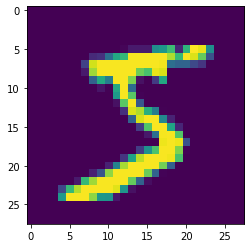

In [7]:
# Pour les images en deux dimensions: utilisation de la fonction: imshow de matplotlib(affichage des objets tableau de dimension 2)
# On voit des valeurs très claires pour des points proche de 0 et des valeurs très foncées proche des point de 255
plt.imshow(single_image)

In [9]:
# Exploration des étiquettes ou labels:y
y_train
# le label à comme première valeur 5 qui correspond à notre première valeur du set d'entrâinement X_train
# les labels sont littéralement les chiffres qu'il représente
#la première valeur n'est pas une valeur mais une catégorie: donc il s'agit d'un problème de classification

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# Encodage des labels avec One-Hot Encoding
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape
# Cela retourne 60.000 chiffres étiquettés dans les labels. il faut les encoder en one-hot afin que chacun de ces chiffres représente une catégorie

(60000,)

In [13]:
#to_categorical cette fonction convertit un vecteur de classe d'entier en une matrice de classe 1 ou 0
y_examples=to_categorical(y_train)

In [15]:
y_examples.shape

(60000, 10)

In [16]:
# Conversion à la fois les labels d'entraînement et labels de test en label catégorielle avec one-hot encoding
y_cat_test=to_categorical(y_test,num_classes=10)
y_cat_train=to_categorical(y_train,num_classes=10)

In [17]:
# Normalisation des données d'entraînement avec la méthode MinMaxScaler
# données d'entraînement sont les données d'images 
x_train=x_train/255
x_test=x_test/255

In [18]:
scaled_image=x_train[0]

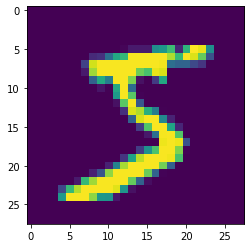

In [19]:
# Affichage de l'image
plt.imshow(scaled_image)

 reshape les données en ajoutant le canal de couleur pour obtenir le format que le réseau de neurones attend
 - regardons la form x_train
-  on obtient 60.000 par 28 par 28, tout à fait correct pour un CNN mais on besoin de rajouter une dimension supplémentaire  pour permettre au réseau de savoir quel'on traite un seul canal de couleur RGB
-  les images sont en noir et blanc donc 1 seul canal de couleur, avant la normalisation c'était de 0 à 255

- en première valeur on aura batch_size(taille du lot sur le nbre d'image)
-  width (la largeur)
-  hauteur(heigth)
- color_channel (canal de couleur)

In [20]:
# regardons la form x_train
x_train.shape

(60000, 28, 28)

In [21]:
# batch_size,width,heigth,color_channel
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)


# Création du modèle CNN et entraînement
- couche flatten: pour transformer nos données multi-dimensionnelles en un vecteur uni-dimensionnel. ceci afin que nos données images d'adaptent à notre couche dense finale qui effectuera la classification

- la première couche c'est la Conv2D avec ces paramètres:

  * filters:plus les images sont grandes plus il y a de classes de classifications plus on devrait avoir de filtres. choix du nombre de filtre en prenant une puissance de 2

  * Kernel_size: taille du noyaux,une bonne taille 4 X 4

  * strides:taille du pas qu'on utilise lorsque l'on déplace le noyaux sur une image . le choix dépend

  * padding:soit valide:n'applique aucun padding ou rembourage sur le bord de l'image. on suppose que toutes les dimensions sont valides de sortes que les dimensions soient entièrement couverte par le noyau et le stride spécifié: 28/4=7, mais si on dépasse il faut rembourer
  
  * Input_shape: pour définir la forme des entrées attendues. il s'agit de la forme ou shape d'une seule image

  * Activation='relu'

- deuxième couche: couche de pooling avec le paramètre le plus important pool_size(moitié de la taille du noyau)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D, Flatten

In [24]:
# construction du modèle
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

# keras.io/metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-04-21 15:45:59.908798: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-21 15:45:59.908828: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-21 15:45:59.908851: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hprisser): /proc/driver/nvidia/version does not exist
2022-04-21 15:45:59.909081: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
# mise en place d'un callbacks  Eralystopping pour anticiper l'arrêt si besoin
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', patience=1)

In [26]:
# entraînment du modèle
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10


2022-04-21 15:47:26.728478: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 28s 15ms/step - loss: 0.1449 - accuracy: 0.9571 - val_loss: 0.0560 - val_accuracy: 0.9819
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0541 - val_accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0415 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0391 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0439 - val_accuracy: 0.9866


# Evaluation du modèle

<AxesSubplot:>

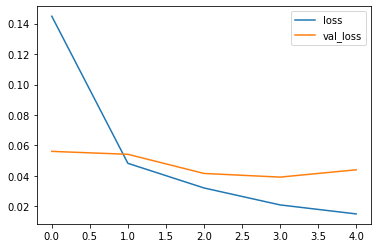

In [27]:
metric=pd.DataFrame(model.history.history)
metric[['loss','val_loss']].plot()

<AxesSubplot:>

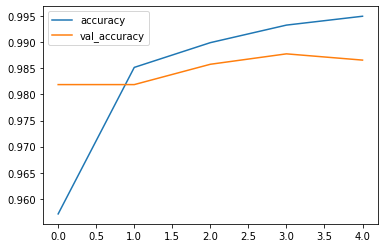

In [28]:
# Tracer l'accuracy pour l'entraînement et la validation
metric[['accuracy','val_accuracy']].plot()

In [29]:
# Pour savoir quel metrics sont disponibles dans notre model
model.metrics_names

['loss', 'accuracy']

In [30]:
# Pour avoir les valeurs des metrics: loss et accuracy
# ce qui ressort la perte loss et l'exactitude sur le set de test
# exactitude: calcul du pourcentage de réponse obtenu correcte
# loss: resultat de l'entropie croisée catégorielle spécifié lors de la compilation du modèle 
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04393346235156059, 0.9865999817848206]

In [31]:
# Rapport de classification et matrice de confusion

from sklearn.metrics import classification_report,confusion_matrix

In [32]:
# récupération des prédictions
# on a une classification multiclasse avec une fonction d'activation softmax
# on obtient un tableau en 2 dimensions avec 10 colonnes pour les 10 classes d'images et sur les lignes on a toutes nos images test
# on a donc une probabilité par classe et on veut récupérer la classe ou catégorie de la plus grande probabilité
# En prenant  par ex la première image x_test[0]: on obtient 10 probabilités et si on les sommes on obtient 1 pour 100%
# la plus grande proba est 9.99 10 puissance moins 1 situé à l'index 7
# Donc notre prédiction devrait être le type d'image 7
model.predict(x_test)[0]

array([1.1828827e-08, 1.4304284e-08, 1.7202744e-07, 1.9346453e-07,
       2.1171159e-11, 4.0496873e-10, 3.1315028e-15, 9.9999928e-01,
       1.8610352e-08, 1.9456080e-07], dtype=float32)

In [33]:
# Pour obtenir l'index de la plus grande proba et obtenir la prédiction du numéro du type d'image 
# Utilisation de la fonction argmax de Numpy pour chercher l'index de la plus grande valeur mais le long des colonnes(axis=1)
# ce qui permet de récupérer de la prédiction de la ligne de l'image de test correspondante
predictions=np.argmax(model.predict(x_test),axis=1)

In [34]:
# rapport de classification
rapport=classification_report(y_test,predictions)

In [36]:
print(rapport)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [37]:
# matrice de confusion
cm=confusion_matrix(y_test,predictions)
print(cm)

[[ 974    0    0    1    1    0    3    0    1    0]
 [   0 1125    4    0    0    0    2    0    4    0]
 [   1    0 1026    0    0    0    0    4    1    0]
 [   1    0    5  997    0    4    0    0    3    0]
 [   0    0    0    0  976    0    1    0    0    5]
 [   1    0    0    5    0  885    1    0    0    0]
 [   5    1    0    0    2    1  946    0    3    0]
 [   0    1   15    2    0    0    0 1004    2    4]
 [   5    0    3    0    0    1    0    0  963    2]
 [   0    2    0    5    9   11    0    6    6  970]]


<AxesSubplot:>

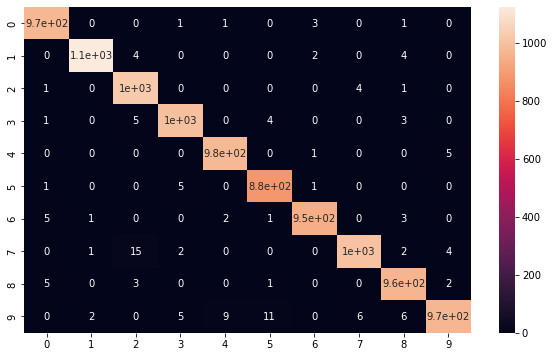

In [38]:
# Pour visauliser 
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)

In [43]:
# Faire la prédiction à partir d'une image donnée
my_number=x_test[9]

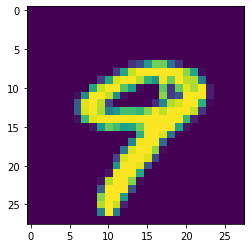

In [44]:
plt.imshow(my_number.reshape(28,28))

In [45]:
# pour remodeler(reshape), tenir compte:
# nombre_images,width,heigth,color_channels
# ca c'est la forme avec laquelle le modèle a été entraîné
np.argmax(model.predict(my_number.reshape(1,28,28,1)),axis=-1)

array([9])